Upload the training and testing data to github so that we can directly use it from colab

In [1]:
!git clone https://github.com/lovethatcat/DataMining.git
!ls -R

Cloning into 'DataMining'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 2), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
.:
DataMining  sample_data

./DataMining:
testing.csv  training.csv

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
data = pd.read_csv('./DataMining/training.csv')

method 3: KNN

In [0]:
X = data.iloc[:, 1:]
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


random_grid = {
    'n_neighbors':[int(x) for x in np.linspace(start = 5, stop = 31, num = 20)],
    'metric': ['manhattan','minkowski','euclidean'],
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [int(x) for x in np.linspace(start=30, stop=200, num = 10)]
               }


knc = KNeighborsClassifier()
knc_random = RandomizedSearchCV(estimator=knc, 
	param_distributions=random_grid, n_iter=100, cv=3,
	verbose=2, random_state=42, n_jobs=-1)
knc_random.fit(X_train, y_train)
print(knc_random.best_params_)
best_random = knc_random.best_estimator_
y_predict_knc = knc_random.predict(X_test)
y_predict_knc_best_random = best_random.predict(X_test)

acc_random = accuracy_score(y_test, y_predict_knc_best_random)
acc_knc = accuracy_score(y_test, y_predict_knc)
print(acc_knc)

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'leaf_size': [30, 48, 67, 86, 105, 124, 143, 162, 181, 200],
 'metric': ['manhattan', 'minkowski', 'euclidean'],
 'n_neighbors': [5,
                 6,
                 7,
                 9,
                 10,
                 11,
                 13,
                 14,
                 15,
                 17,
                 18,
                 20,
                 21,
                 22,
                 24,
                 25,
                 26,
                 28,
                 29,
                 31],
 'weights': ['uniform', 'distance']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 26.3min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 98.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 179.9min finished


{'weights': 'distance', 'n_neighbors': 5, 'metric': 'euclidean', 'leaf_size': 30, 'algorithm': 'kd_tree'}
0.955047619047619


method 4: SVM

In [7]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve

train = pd.read_csv('./DataMining/training.csv')
lab_encoder = LabelEncoder()
label = train['label']
label_encoded = lab_encoder.fit_transform(label)
label_encoded
df2 = train.drop(columns = ['label'])
x_train = df2.values
# split the training data set 
x_test = x_train[15000:21000] # use 1/3 of training data to test
x_train =x_train[0:14999] # use 2/3 of traing data to train 

from sklearn.preprocessing import MinMaxScaler #use this to do the scaling
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)
x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

# svc classifier
model=svm.SVC()
model.fit(x_train,label_encoded[0:14999])
compare = []
for i in range(0,6000):
    result = model.predict(x_test[i].reshape(1, 784))
    compare.append(result[0]) 
accuracy_score(compare, label[15000:21000])

0.9665

In [41]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

X = data.iloc[:, 1:]
y = data['label']
y = y == 9

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

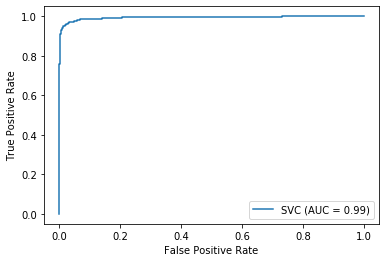

In [42]:
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

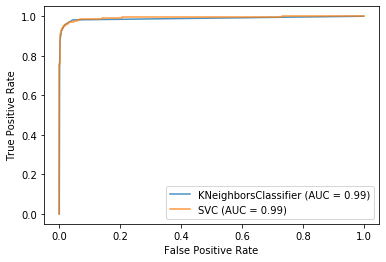

In [43]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
ax = plt.gca()
knn_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()